# Модель для классификации FashionMNIST. 


In [2]:
import matplotlib.pyplot as plt
import time
import torch
import numpy as np
import torchvision as tv

%matplotlib inline

## Загрузил данные

In [3]:
BATCH_SIZE=256

In [4]:
train_dataset = tv.datasets.FashionMNIST('.', train=True, transform=tv.transforms.ToTensor(), download=True)
test_dataset = tv.datasets.FashionMNIST('.', train=False, transform=tv.transforms.ToTensor(), download=True)
train = torch.utils.data.DataLoader(train_dataset, batch_size=BATCH_SIZE)
test = torch.utils.data.DataLoader(test_dataset, batch_size=BATCH_SIZE)

## Просмотр данных

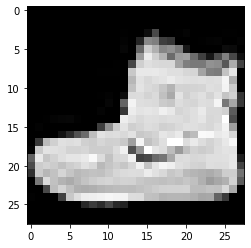

In [5]:
plt.imshow(train_dataset[0][0].numpy().reshape(28,28), cmap='gray');

In [6]:
dataiter = iter(train)
images, labels = dataiter.next()
print(type(images))
print(images.shape)
print(labels.shape)

<class 'torch.Tensor'>
torch.Size([256, 1, 28, 28])
torch.Size([256])


## Модель

In [34]:
model = torch.nn.Sequential(
    torch.nn.Conv2d(1, 6, kernel_size=5, padding=2),
    torch.nn.ReLU(),
    torch.nn.MaxPool2d(2, stride=2),
    torch.nn.Conv2d(6, 12, kernel_size=5),
    torch.nn.ReLU(),
    torch.nn.MaxPool2d(2, stride=2),
    torch.nn.Flatten(),
    torch.nn.Linear(300, 50),
    torch.nn.ReLU(),
    torch.nn.Linear(50, 10)
)
print(model)

Sequential(
  (0): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (1): ReLU()
  (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (3): Conv2d(6, 12, kernel_size=(5, 5), stride=(1, 1))
  (4): ReLU()
  (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (6): Flatten()
  (7): Linear(in_features=300, out_features=50, bias=True)
  (8): ReLU()
  (9): Linear(in_features=50, out_features=10, bias=True)
)


In [35]:
loss = torch.nn.CrossEntropyLoss()
trainer = torch.optim.Adam(model.parameters(), lr=0.007)
num_epochs = 15

# Обучаем модель

In [36]:
for ep in range(num_epochs):
    train_iters, train_passed  = 0, 0
    train_loss, train_acc = 0., 0.
    
    for X, y in train:
        trainer.zero_grad()
        y_pred = model(X)
        l = loss(y_pred, y)
        l.backward()
        trainer.step()
        train_loss += l.item()
        train_acc += (y_pred.argmax(dim=1) == y).sum().item()
        train_iters += 1
        train_passed += len(X)
    
    test_iters, test_passed  = 0, 0
    test_loss, test_acc = 0., 0.
    for X, y in test:
        y_pred = model(X)
        l = loss(y_pred, y)
        test_loss += l.item()
        test_acc += (y_pred.argmax(dim=1) == y).sum().item()
        test_iters += 1
        test_passed += len(X)
        
    print("ep: {}, train_loss: {}, train_acc: {}, test_loss: {}, test_acc: {}".format(
        ep, train_loss / train_iters, train_acc / train_passed,
        test_loss / test_iters, test_acc / test_passed)
    )

ep: 0, train_loss: 0.6236987950954032, train_acc: 0.7694666666666666, test_loss: 0.44356713593006136, test_acc: 0.8447
ep: 1, train_loss: 0.3716092882638282, train_acc: 0.8648666666666667, test_loss: 0.3723005592823029, test_acc: 0.8644
ep: 2, train_loss: 0.32339991553032654, train_acc: 0.88125, test_loss: 0.36950135342776774, test_acc: 0.8673
ep: 3, train_loss: 0.2967651171253083, train_acc: 0.8912666666666667, test_loss: 0.36259737573564055, test_acc: 0.8727
ep: 4, train_loss: 0.2785381849775923, train_acc: 0.8972333333333333, test_loss: 0.3482178010046482, test_acc: 0.8783
ep: 5, train_loss: 0.2704242723419311, train_acc: 0.8996833333333333, test_loss: 0.32989147342741487, test_acc: 0.8853
ep: 6, train_loss: 0.2578368675201497, train_acc: 0.9042, test_loss: 0.3283436313271523, test_acc: 0.8886
ep: 7, train_loss: 0.2503941528974695, train_acc: 0.9069166666666667, test_loss: 0.3361741740256548, test_acc: 0.8868
ep: 8, train_loss: 0.23969502810468066, train_acc: 0.9115666666666666, tes